# Random Variables and Distributions: Binomial

Name: Arthur Pontes Nader

##### "The concept of random variables provide the link between probability and statistics"

Each random variable can be thought of simply as being the combination of two components: a set of possible values and the probability associated with each value.

Practically speaking, the elements of a table column can be seen as instances of a random variable.

##### "We can think of the data analyst addressing a practical problem with a bag of well-known probability distributions. He would like not to need to invent a new distribution but rather, to use one of those that are already in your bag"

## Libraries

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

## Binomial distribution

First, lets generate the probabilities associated to a Binomial with 20 essays and probability 0.15 of succes

In [2]:
def binomial(n, theta):

    k = np.arange(0, n)
    probs = stats.binom.pmf(k, n, theta)
    cum_probs = stats.binom.cdf(k, n, theta)
    
    return probs, cum_probs, k

In [3]:
n = 20
theta = 0.15
probs, cum_probs, k = binomial(n, theta)

In [4]:
probs

array([3.87595311e-02, 1.36798345e-01, 2.29338402e-01, 2.42828896e-01,
       1.82121672e-01, 1.02845180e-01, 4.53728733e-02, 1.60139553e-02,
       4.59223718e-03, 1.08052640e-03, 2.09749241e-04, 3.36496109e-05,
       4.45362498e-06, 4.83651581e-07, 4.26751395e-08, 3.01236279e-09,
       1.66122948e-10, 6.89783867e-12, 2.02877608e-13, 3.76862429e-15])

Now, let's see the graphs associated with the probabilities

In [5]:
def plot_distribution(probs, cum_probs, k, n):

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.stem(k, probs)
    plt.title('Probabilities P(X = k)', fontsize = 18)
    plt.xlabel('k', fontsize = 14)
    plt.ylabel('P(X = k)', fontsize = 14)
    plt.xticks(np.arange(0, n+1, 2))

    plt.subplot(1, 2, 2)
    plt.step(k, cum_probs, where='post')
    plt.title('Cumulative probability function F(x)', fontsize = 18)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('F(x)', fontsize = 14)
    plt.xticks(np.arange(0, n+1, 2))

    plt.tight_layout()
    plt.show()

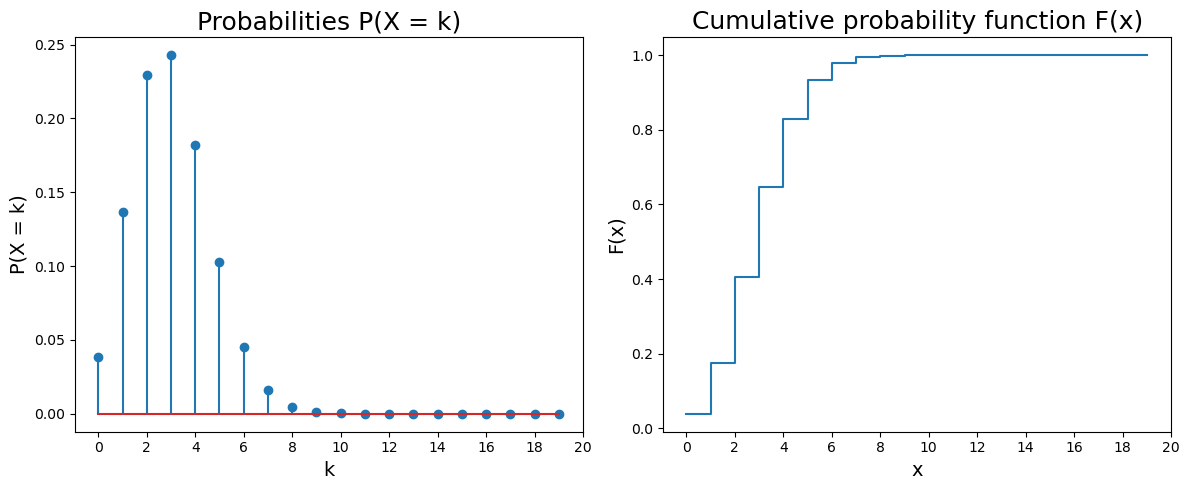

In [6]:
plot_distribution(probs, cum_probs, k, n)

We can see that he value of k which the probability is maximum is 3. The associated propability is:

In [7]:
max(probs)

0.24282889614926753

The range of values (a, b) which the propability of X ∈ (a, b) is near 1 seems to be a = 0 and b = 8

In [8]:
print(cum_probs[8])

0.9986710916152031


What about the expecte value?

In [9]:
expected_value = n*theta
print(expected_value)

3.0


We can also calculated it multiplying the possible values by the associated probabilities:

In [10]:
print(np.array(k.dot(np.array(probs)).T))

2.999999999999999


Around the expected value, the function presents relatively high values P(X = k).

With values between 1 and 5, for example, we have the following probability:

In [11]:
print(cum_probs[5]-cum_probs[0])

0.8939324947297116


To obtain the integer k such that F(k) = P(X ≤ k) ≈ 0.95:

In [12]:
valor = stats.binom.ppf(0.95, n, theta)
print(valor)

6.0


The value of the exact cumulative probability F(k) obtained with the value 6 is:

In [13]:
print(cum_probs[int(valor)])

0.9780648991431549


If we use 5, we can see that we did not reach 95%

In [14]:
print(cum_probs[5])

0.932692025814226


We can generate samples of a distribution using the function:

In [15]:
samples = np.random.binomial(n, theta, 1000)

In [16]:
mask = (samples >= 1) & (samples <= 5)
count = np.count_nonzero(mask)

print("Percentage of values that are between 1 and 5: ", count/1000)

Percentage of values that are between 1 and 5:  0.906


Most values are in the range of 1 to 5. Compare the frequency in the saples with the theoretical probabilities:

In [17]:
for i in range(7):
    print(f"P(X = {i}): ", round(probs[i],3))
    
    mask = (samples == i)
    count = np.count_nonzero(mask)
    print(f"Frequency of {i} in the generated values: ", count/1000, "\n")

P(X = 0):  0.039
Frequency of 0 in the generated values:  0.034 

P(X = 1):  0.137
Frequency of 1 in the generated values:  0.148 

P(X = 2):  0.229
Frequency of 2 in the generated values:  0.221 

P(X = 3):  0.243
Frequency of 3 in the generated values:  0.246 

P(X = 4):  0.182
Frequency of 4 in the generated values:  0.199 

P(X = 5):  0.103
Frequency of 5 in the generated values:  0.092 

P(X = 6):  0.045
Frequency of 6 in the generated values:  0.04 



## A practical example: Vaccine trial

There is a disease in cattle with an incidence of 25%. We want to test a new vaccine in n animals.

For each animal, p = 0.75 is the probability that the animal is healthy.

If the vaccine is totally useless, the probability that k of n animals are not with the disease is given by:

$$ P(X = k) = \frac{n!}{k!(n - k)!} 0.75^k 0.25^{n-k} $$

Let's try some configurations:

In [7]:
n = 10 
k = 10
p = 0.75 ;

probability = stats.binom.pmf(k, n, p)
print(probability)

0.056313514709472656


In [6]:
n = 12
k = 12
p = 0.75 ;

probability = stats.binom.pmf(k, n, p)
print(probability)

0.03167635202407837


Therefore, if in a group of 10 or 12 animals none of the have the disease, it is a strong evidence that the vaccine had some effect, because the probability is very low. However, this result cannot be considered a conclusive test (we could try an A/B test later). Let's try a different configurantion, where k is different from b:

In [24]:
n = 17
k = 16
p = 0.75 ;

probability = 0

probability += stats.binom.pmf(k, n, p) + stats.binom.pmf(k+1, n, p)

print(probability)

0.05011297878809271


In the configuration above, we obtained the probability of at most one animal has the disease. So, if we have 17 animals and only 1 or none of them have the disease, it is great evidence that the vaccine is effective, because the probability of this event is very high, it is even stronger than the case in which we have had 0 infected over 10 animals.

In [48]:
n = 23
k = 21
p = 0.75 ;

probability = stats.binom.pmf(k, n, p) + stats.binom.pmf(k+1, n, p) + \
                    stats.binom.pmf(k+2, n, p)

print(probability)

0.049203335240022746


2 or fewer infected animals in 23 animals is even better evidence of vaccine effectiveness than 1 in 17, because the probability is lower. We can use cdf instead of pmf to avoid summing too many probabilities:

In [58]:
n = 30
k = 22
p = 0.75 ;

probability = stats.binom.cdf(n, n, p) - stats.binom.cdf(k-1, n, p)
print(probability)

0.6735991507240409


In this last configuration, in a group of 30 animals, if we have at least 22 of them healthy, the associated probability is relatively high. It appears that the vaccine is not very effective, although, again, we cannot say that without further testing.

## Erdös-Rényi model for social graphs

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

Let's suppose we have n nodes and each node has and edge with another node with probability 0.01

In [106]:
n = 100
p = 0.01

In [121]:
def create_graph(n, p):

    G = nx.Graph()

    for i in range(n):
        G.add_node(i)

    for i in range(n):
        for j in range(i+1, n):
            if (np.random.binomial(1, p)):
                G.add_edge(i,j)
            
    return G

In [122]:
def show_graph(G):

    plt.figure(figsize=(20, 14))
    nx.draw(G)
    plt.show()

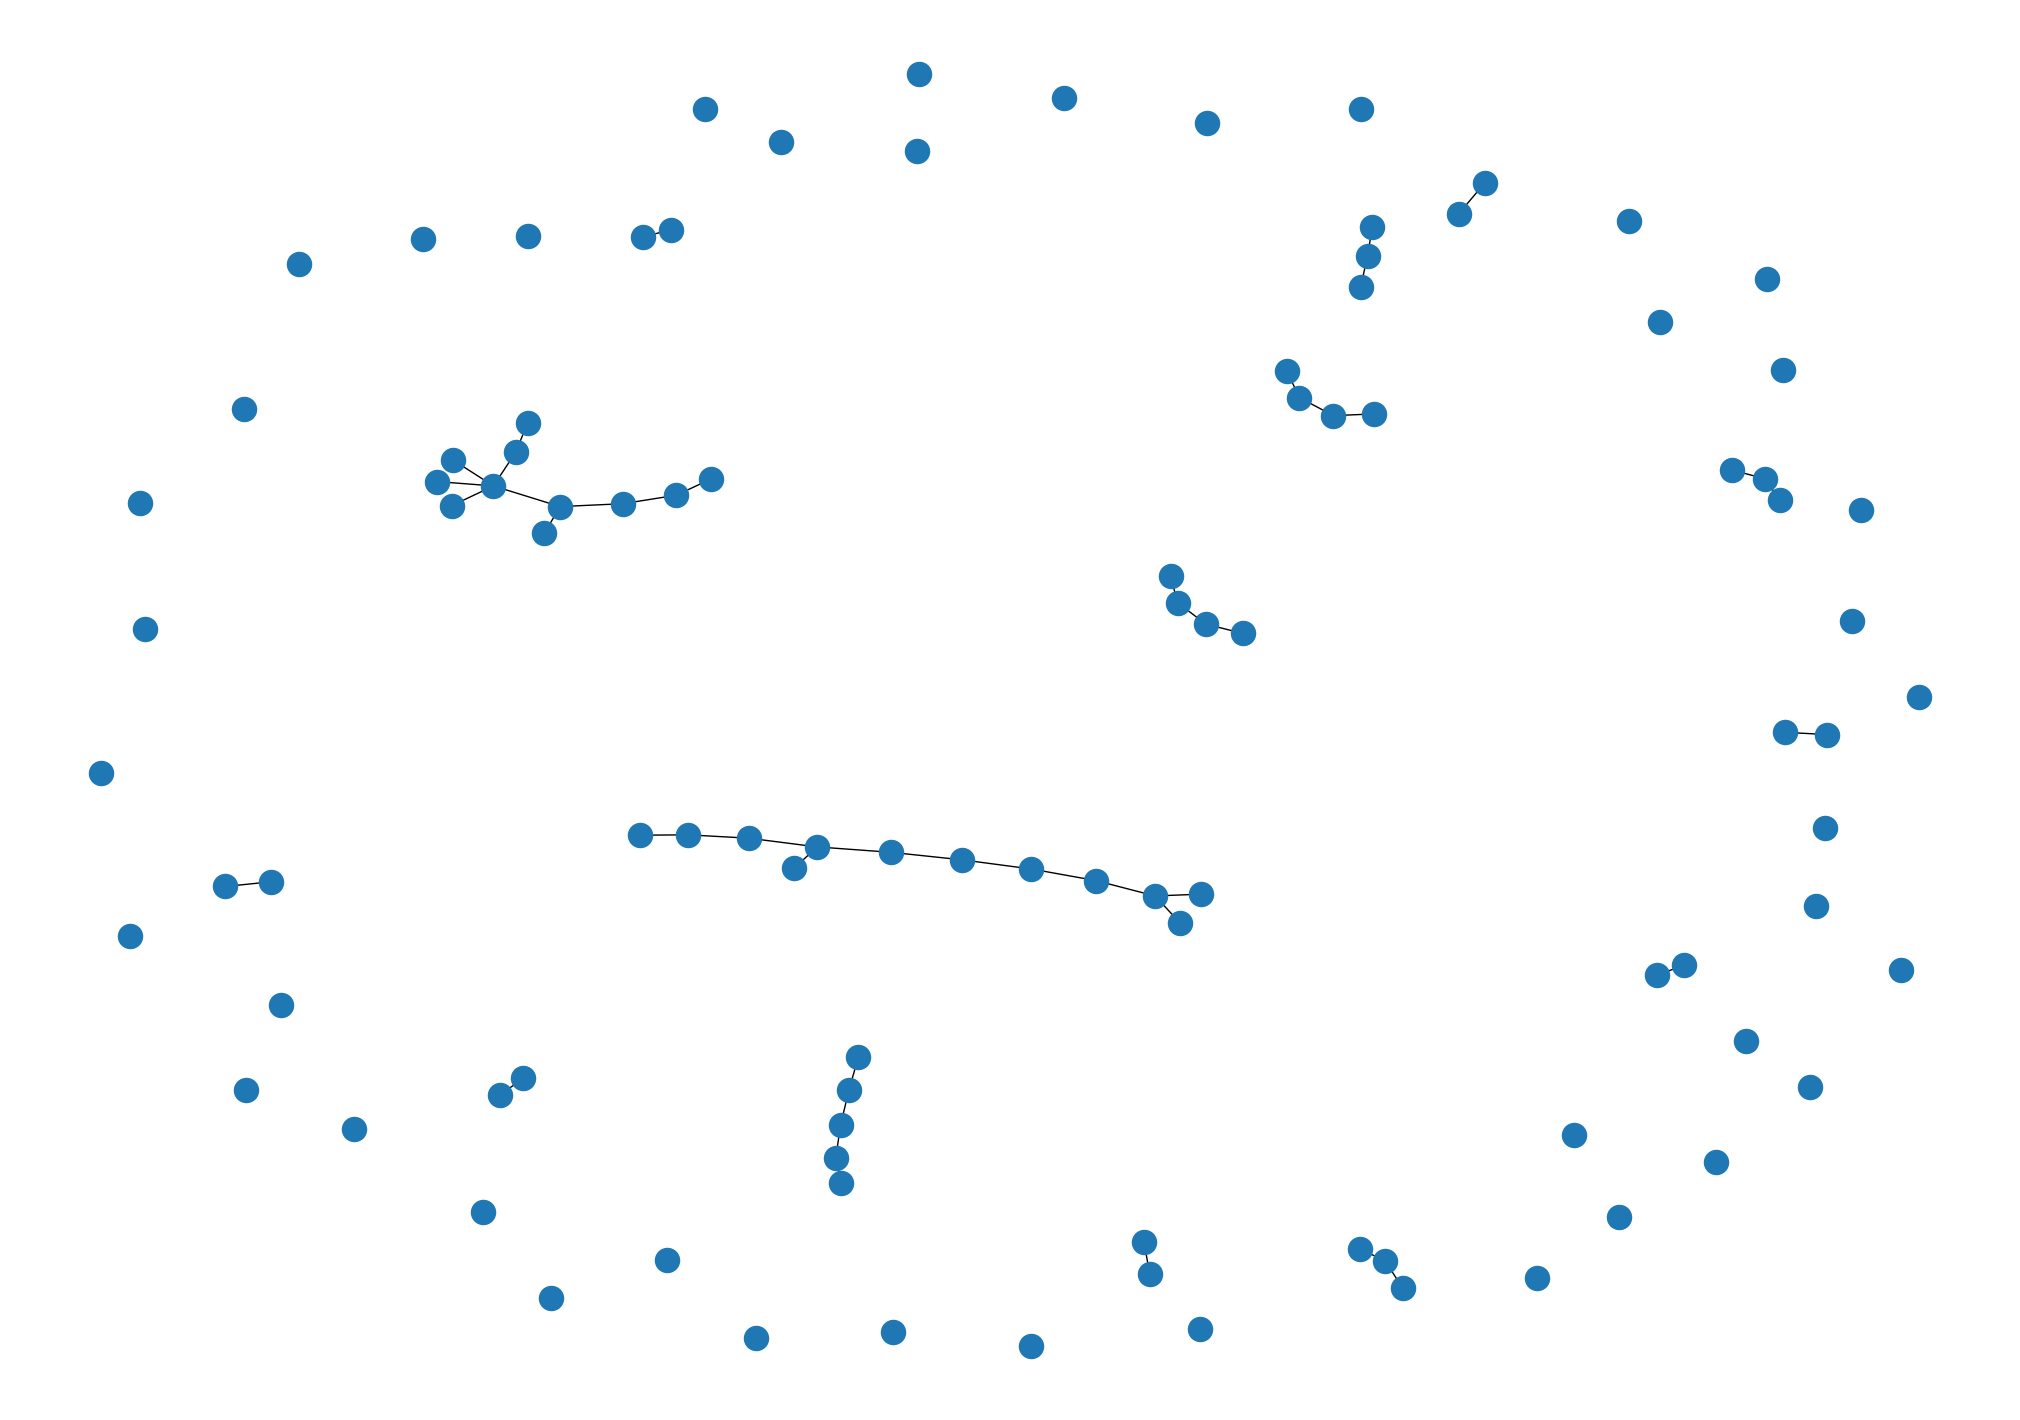

In [123]:
G = create_graph(n, p)
show_graph(G)

Considering np aproximately the expected number of neighboors of any node. Let's see four different situations:

### 1) np > 1

In [157]:
n = 100
p = 0.015
n*p

1.5

The graph certainly will have a connected component of the order of n and a second component smaller than O(log(n))

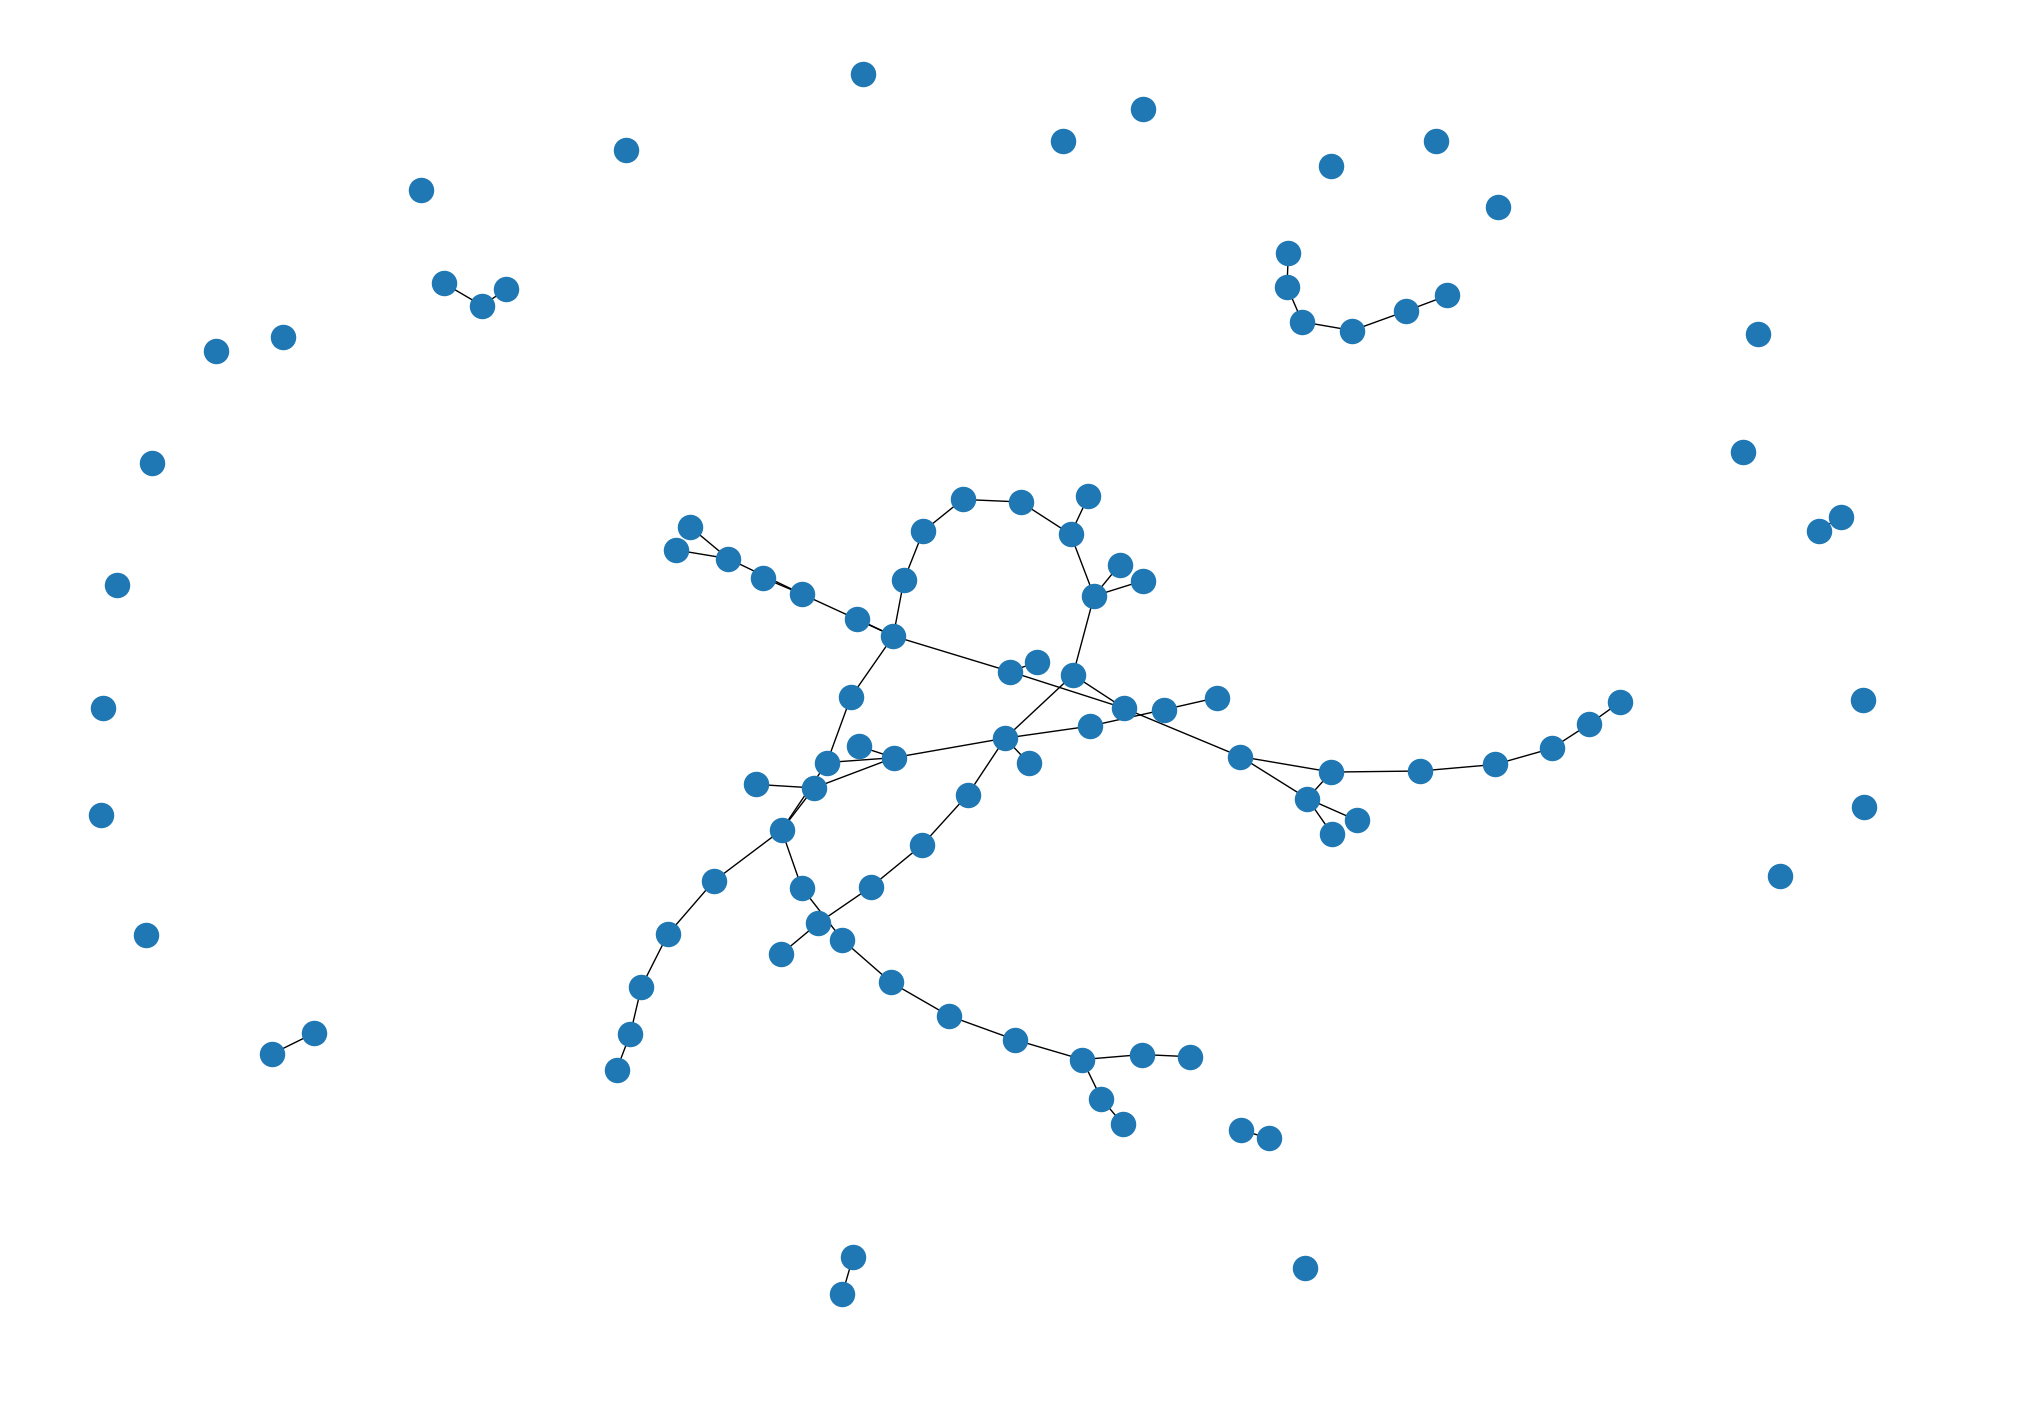

In [158]:
G = create_graph(n, p)
show_graph(G)

### 2) np < 1

In [159]:
n = 100
p = 0.0075
n*p

0.75

The graph certainly won't have a connected component greater than O(log(n))

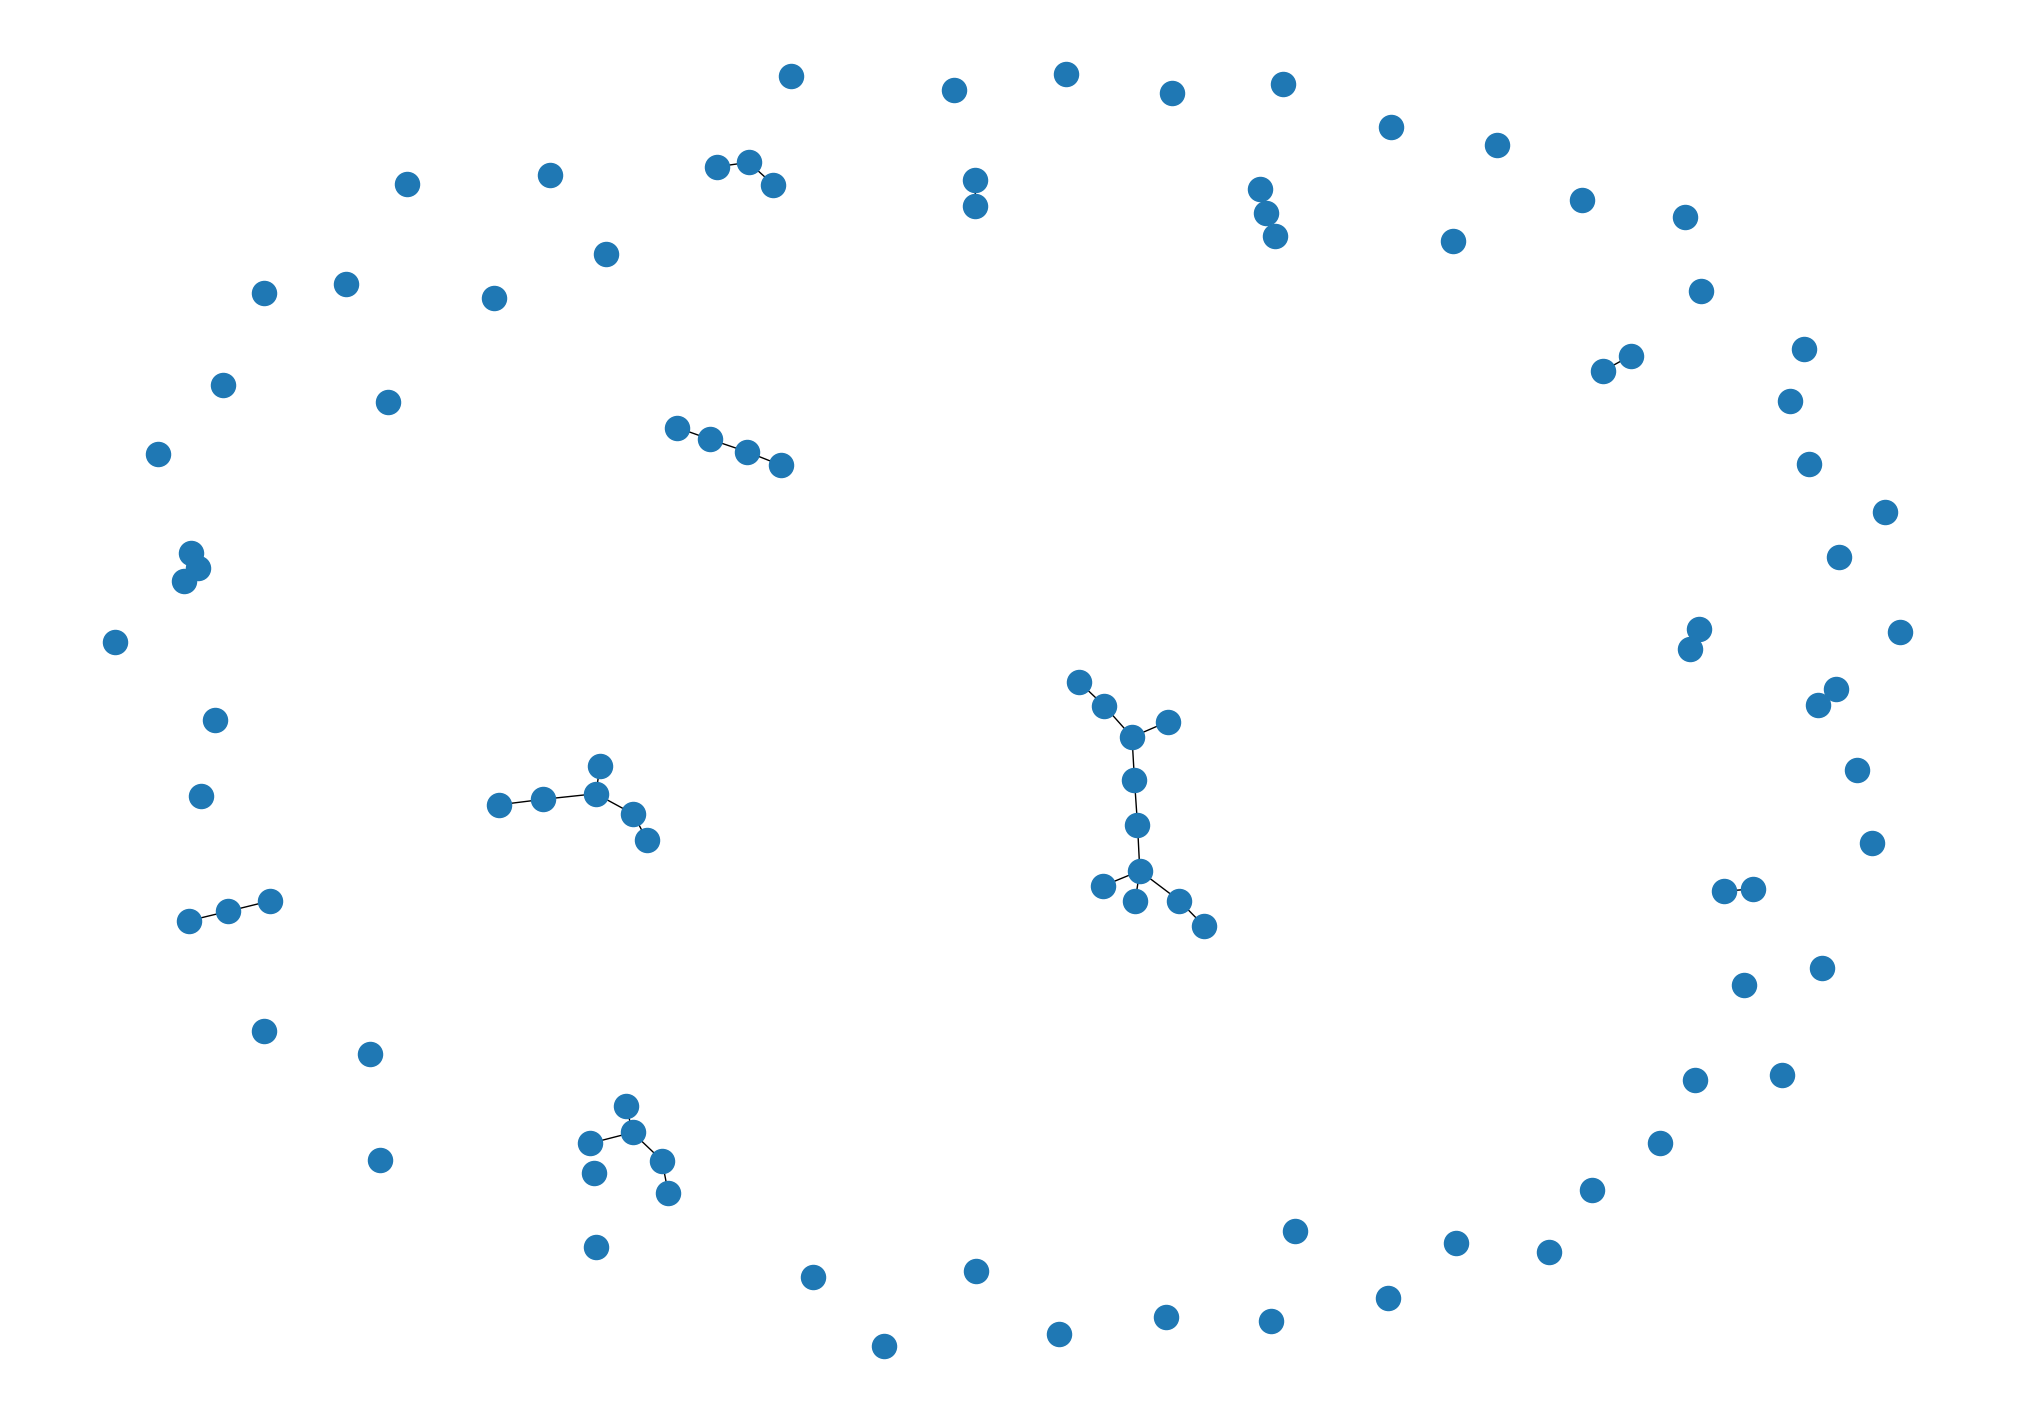

In [160]:
G = create_graph(n, p)
show_graph(G)

### 3) np > (1+epsilon)log(n)

In [161]:
n = 100
p = 0.05
n*p, 1.01*np.log(n)

(5.0, 4.6512218878479725)

The graph is certainly fully connected:

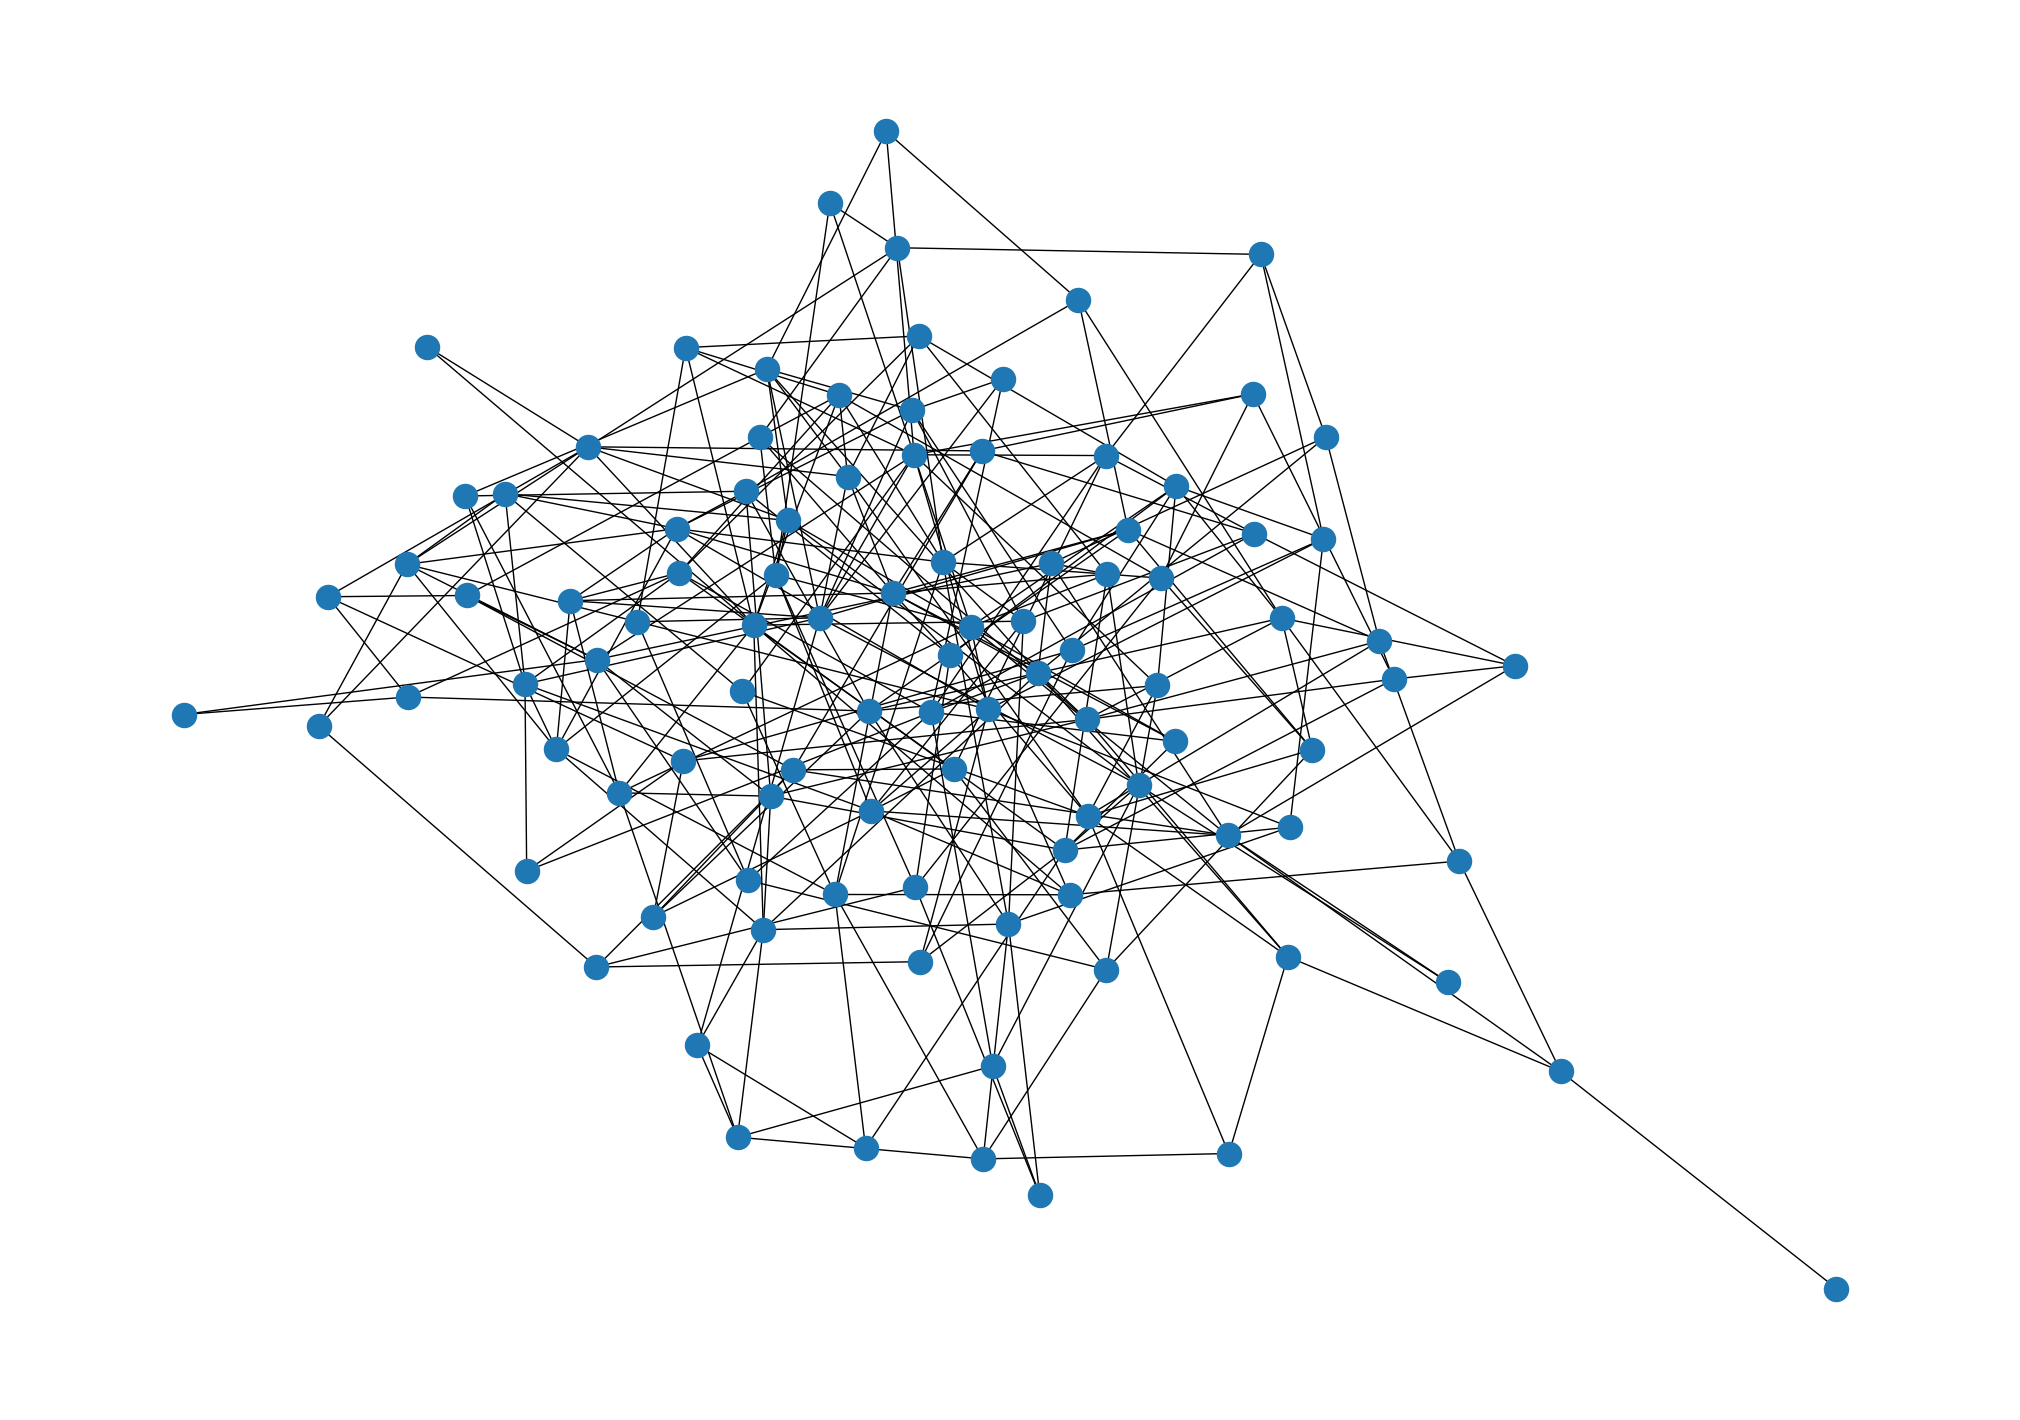

In [144]:
G = create_graph(n, p)
show_graph(G)

### 4) np < (1-epsilon)log(n)

In [148]:
n = 100
p = 0.04
n*p, 0.99*np.log(n)

(4.0, 4.559118484128211)

The graph certaintly has isolated nodes

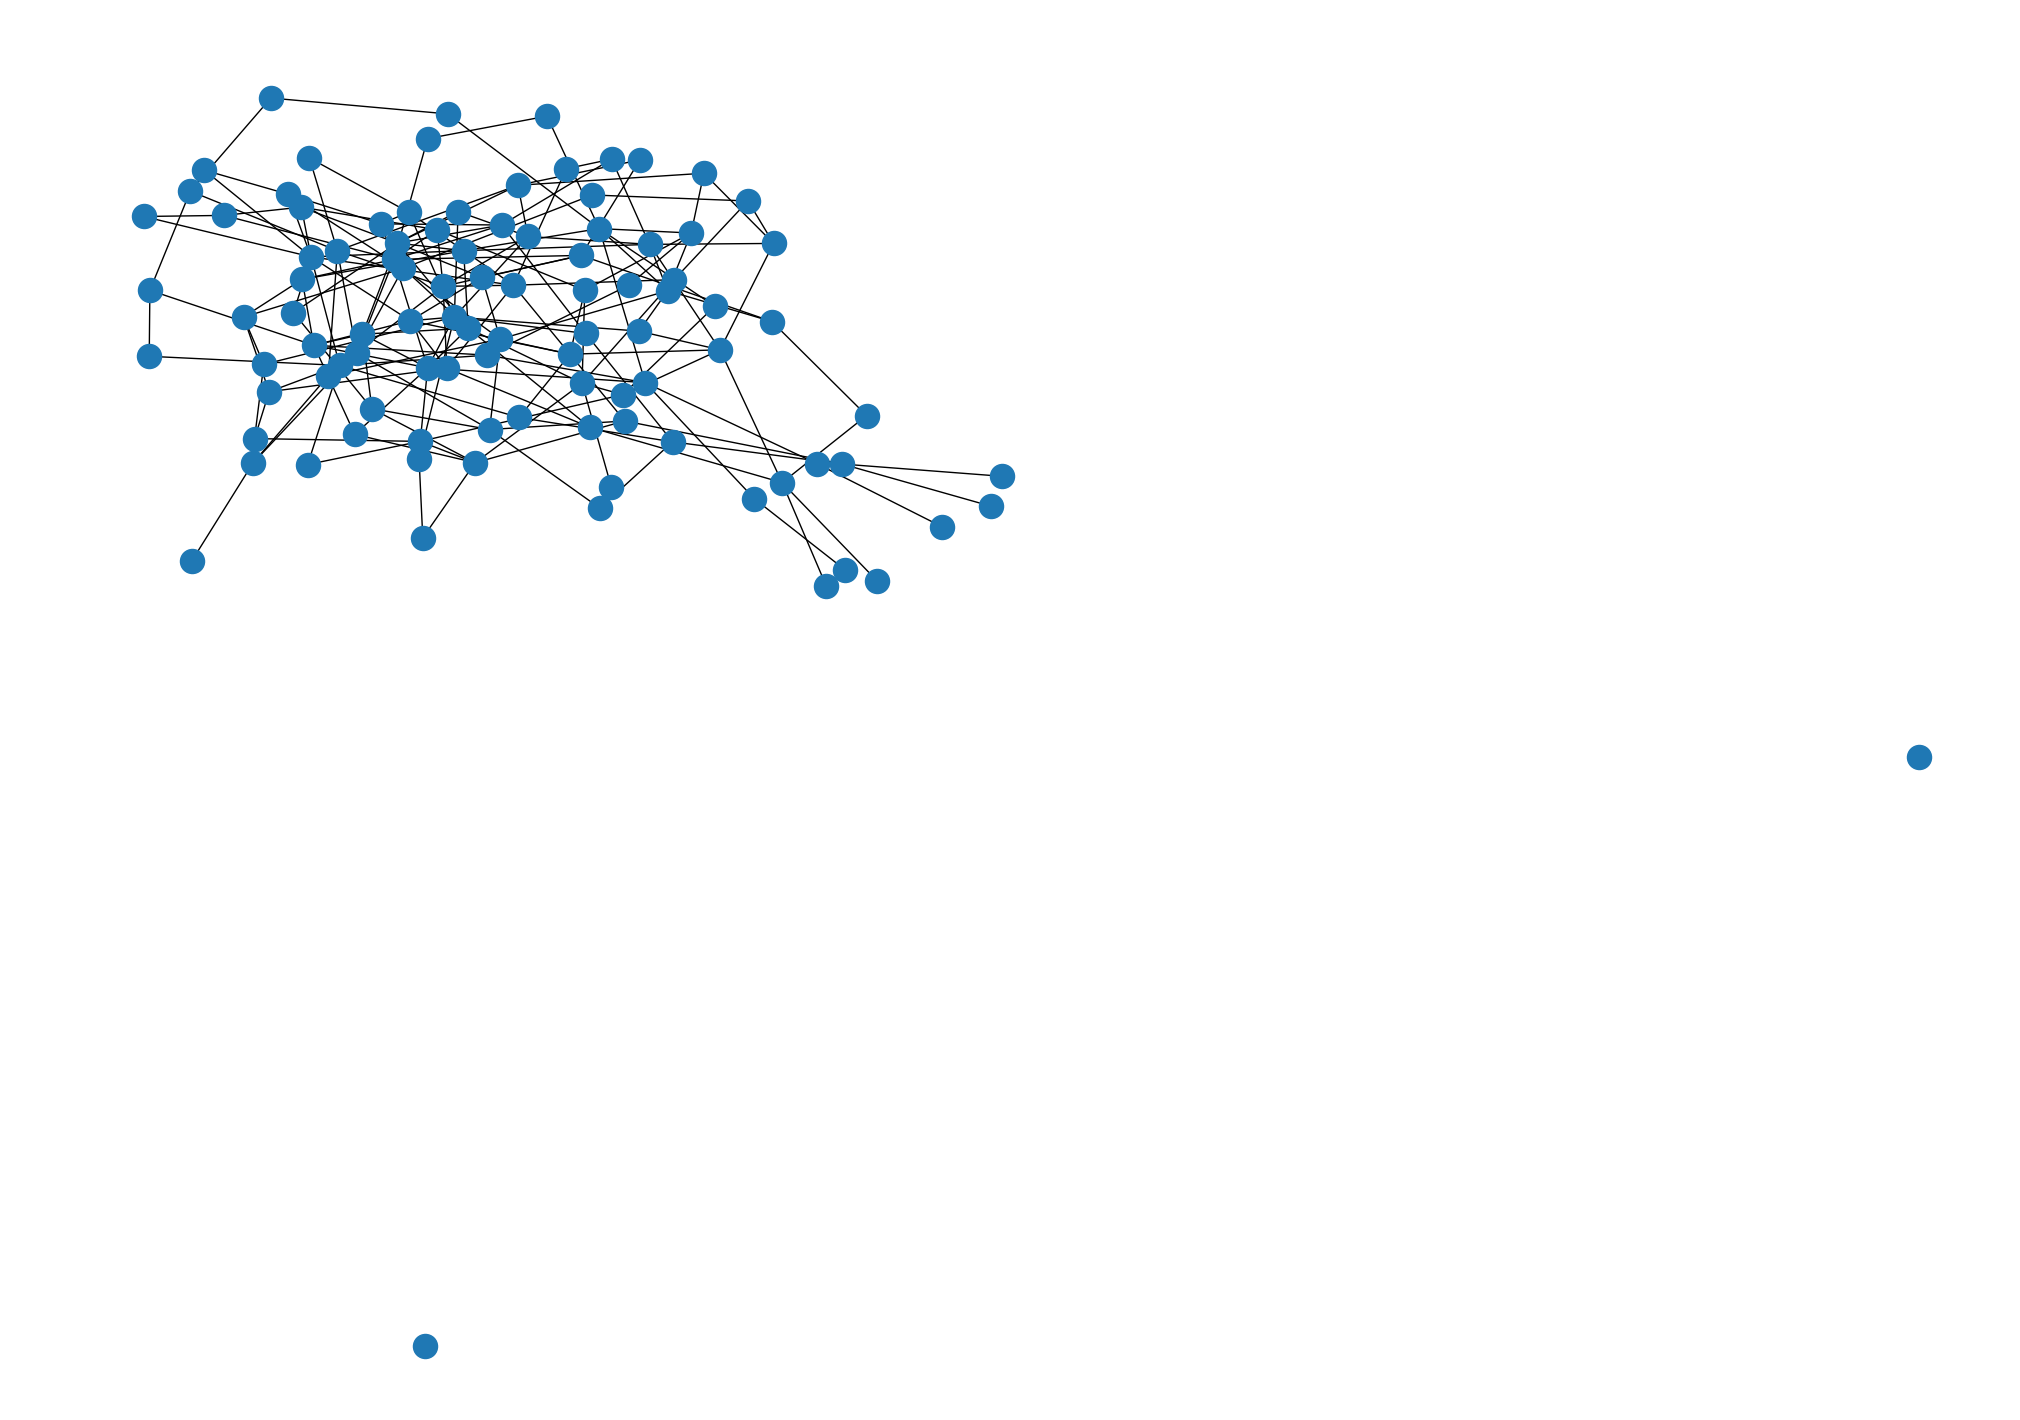

In [149]:
G = create_graph(n, p)
show_graph(G)